In [1]:
### AUTHOR: Tim Meehan
### PRESENTED: python hack night, 2/19/19
### contact: on slack at hack-portland.slack.com

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

# Pandas

pandas is a python library that provides a dataframe structure (think excel spreadsheet). It contains built in data manipulation and statistics functions. This notebook will use dataframes built from python dicts and read from csv's. It has a built in read function for many formats, see http://pandas.pydata.org/pandas-docs/version/0.15/io.html for complete list.

In [3]:
# Example 1 - creating a dataframe

In [4]:
# create a new dataframe and store it under 'dataframe'
dataframe = pd.DataFrame(
 {'col1': [1, 2, 3, 4, 5, 6], 
 'col2': ['a', 'b', 'b', 'a', 'a', 'b'],
 'col3': [130, 145, 145, 123, 140, 157]})

In [5]:
# print the dataframe to the output
dataframe.head()

,col1,col2,col3
0,1,a,130
1,2,b,145
2,3,b,145
3,4,a,123
4,5,a,140


In [6]:
# count the number of times a value occurs in a column
dataframe['col2'].value_counts()

b 3
a 3
Name: col2, dtype: int64

In [7]:
# filter the dataframe based on column values
dataframe[dataframe['col3'].gt(140) & dataframe['col1'].gt(2)]

,col1,col2,col3
2,3,b,145
5,6,b,157


In [8]:
# a filter just takes a boolean mask as input
dataframe['col3'].gt(140) & dataframe['col1'].gt(2)

0 False
1 False
2 True
3 False
4 False
5 True
dtype: bool

In [9]:
# add a column, that is the sum of two columns
dataframe['col4'] = dataframe['col1'] + dataframe['col3']
dataframe

,col1,col2,col3,col4
0,1,a,130,131
1,2,b,145,147
2,3,b,145,148
3,4,a,123,127
4,5,a,140,145
5,6,b,157,163


In [10]:
# define some complicated function, and apply it to each value in a column (series)
def mod_col_3(val):
 """if val gt 140 return 1, else return 0"""
 if val > 140:
 output = 1
 else:
 output = 0
 return output

# the apply function returns a new series, it will not change the input series
# we will assign the result to a new column in the df
dataframe['col5'] = dataframe['col3'].apply(mod_col_3)
dataframe

,col1,col2,col3,col4,col5
0,1,a,130,131,0
1,2,b,145,147,1
2,3,b,145,148,1
3,4,a,123,127,0
4,5,a,140,145,0
5,6,b,157,163,1


In [11]:
# get statistics automatically on all numeric columns
dataframe.describe()

,col1,col3,col4,col5
count,6.000000,6.000000,6.000000,6.000000
mean,3.500000,140.000000,143.500000,0.500000
std,1.870829,12.066483,12.988456,0.547723
min,1.000000,123.000000,127.000000,0.000000
25%,2.250000,132.500000,134.500000,0.000000
50%,3.500000,142.500000,146.000000,0.500000
75%,4.750000,145.000000,147.750000,1.000000
max,6.000000,157.000000,163.000000,1.000000


In [12]:
#take the mean of col3
dataframe.col3.mean()

140.0

# matplotlib

matplotlib is the most standard plotting library for python, however there are many more to chose from.

In [13]:
# pandas has some matplotlib functionality built in

In [14]:
dataframe

,col1,col2,col3,col4,col5
0,1,a,130,131,0
1,2,b,145,147,1
2,3,b,145,148,1
3,4,a,123,127,0
4,5,a,140,145,0
5,6,b,157,163,1


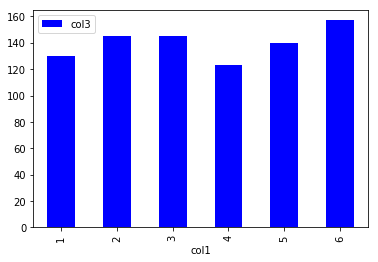

In [15]:
# example bar plot
dataframe.plot(x='col1', y='col3', kind='bar', color='b')

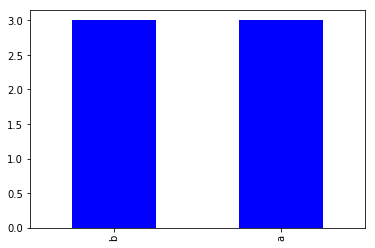

In [16]:
dataframe['col2'].value_counts().plot(kind='bar', color='b')

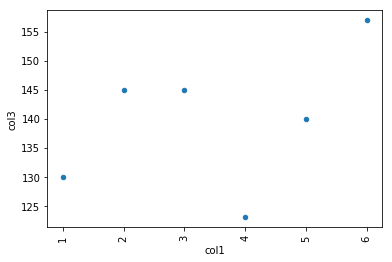

In [17]:
# example scatter plot
dataframe.plot('col1', 'col3', kind='scatter', rot=90)

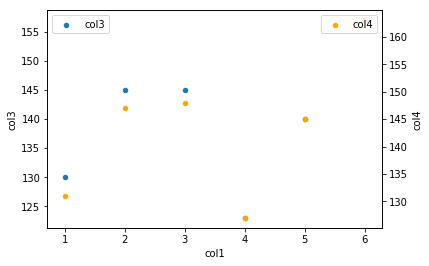

In [18]:
# dual y-axis
ax = dataframe.plot('col1', 'col3', kind='scatter', label='col3')
ax2 = ax.twinx() #pyplot
dataframe.plot('col1', 'col4', kind='scatter', ax=ax2, label='col4', color='orange')
ax2.legend(loc=1) #pyplot

## data from csv

In [19]:
### this section will introduce reading csv, groupby, merge and pivot_table functions

In [20]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [21]:
iris.shape

(150, 5)

In [22]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


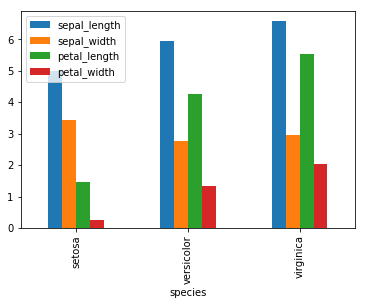

In [23]:
# check avg of each value based on species
iris.groupby('species').mean().plot(kind='bar')

In [24]:
grouped = iris.groupby('species').agg({'sepal_length': ['mean','std'],
 'sepal_width': 'count'})

In [25]:
grouped

sepal_length sepal_width
 mean std count
species 
setosa 5.006 0.352490 50
versicolor 5.936 0.516171 50
virginica 6.588 0.635880 50

In [26]:
grouped.columns.values

array([('sepal_length', 'mean'), ('sepal_length', 'std'),
 ('sepal_width', 'count')], dtype=object)

In [27]:
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]

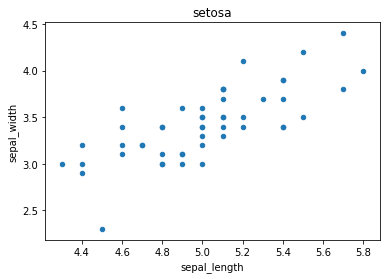

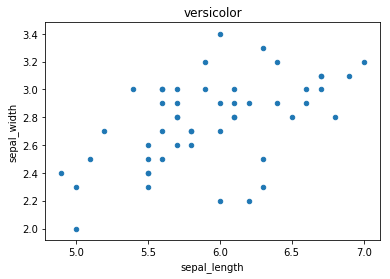

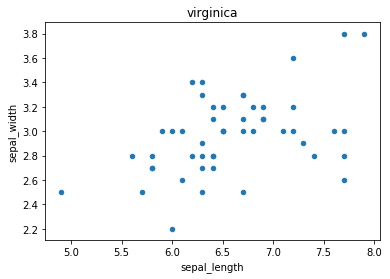

In [28]:
# iterate through subset of dataframe
# each "df" in forloop is a filtered dataframe based on the groupby argument
# "grp" will contain the column val, or list of values, that the current df is filtered by
for grp, df in iris.groupby('species'):
 df.plot('sepal_length','sepal_width', kind='scatter', title=grp)

In [29]:
exercise = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/exercise.csv', index_col=0)

In [30]:
exercise.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


In [31]:
exercise['time'].unique()

array(['1 min', '15 min', '30 min'], dtype=object)

In [32]:
exercise.pivot_table(index=['diet','kind'], columns='time', values='pulse', aggfunc='max')

time 1 min 15 min 30 min
diet kind 
low fat rest 97 97 94
 running 98 132 120
 walking 95 103 104
no fat rest 100 99 100
 running 103 135 150
 walking 103 109 103

In [33]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
 'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
 'hire_date': [2004, 2008, 2012, 2014]})

In [34]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [35]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [36]:
df1.merge(df2, on=['employee'], how='left')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


## Putting it all together

In [37]:
### In this example, we look at (fake) test results
### we will create fake date labels, find the number of passes and fails in each,
### then average the fails by day, which will give you yield (pass/fail is 1,0)
### In addition, for those widgets that passed or failed, we will plot a box plot
### to show the distribution of some parameter, could be temperature, time 
### completing some process step etc...

### the end chart will show by day, how many parts were tested, the yield of those parts
### and the distribution of some parameter, so you can see the change over time and relation
### to the parameter 

In [38]:
### create a fake time index. Use pd.Series to create a single column
date_index = pd.Series(['2018-03-03']*10 + ['2018-03-04']*12 + ['2018-03-05']*18 + ['2018-03-06']*7 + ['2018-03-07']*9 + ['2018-03-08']*20 + ['2018-03-09']*15, name='date')
date_index = pd.to_datetime(date_index)
# print out preview of what the "column" looks like
date_index.head()

0 2018-03-03
1 2018-03-03
2 2018-03-03
3 2018-03-03
4 2018-03-03
Name: date, dtype: datetime64[ns]

In [39]:
### use random numbers to generate pass and fail data
from random import choices, gauss
test1_yld = pd.Series(choices(population=[0, 1], weights=[30, 70], k=91), name='test1_pass_fail')
test2_yld = pd.Series(choices([0, 1], [10, 90], k=91), name='test2_pass_fail')

### create fake process parameter. Think seconds a widget spent at process step x
process_param = pd.Series([gauss(20, 4) for i in range(91)], name='process_param')

In [40]:
### we will also create a fake "widget_id"
widget_id = pd.Series([i for i in range(len(date_index))], name='widget_id')

In [41]:
### concat the fail data together, think of the python zip() function
### the resulting dataframe will have for each date, a number of passes and fails
### think of this as a single widget per row
example_df = pd.concat([date_index, test1_yld, test2_yld, process_param, widget_id], axis=1)
example_df.head()

,date,test1_pass_fail,test2_pass_fail,process_param,widget_id
0,2018-03-03,1,1,16.154771,0
1,2018-03-03,1,1,23.180473,1
2,2018-03-03,1,1,17.247763,2
3,2018-03-03,1,1,19.270181,3
4,2018-03-03,1,1,28.049684,4


In [42]:
### summarize the average pass value by date. This will be your yield trend
### you can also aggregate the "nunique" pandas function to count the unique number of widgets per date
yield_trend = example_df.groupby('date').agg({'test1_pass_fail': 'mean',
 'test2_pass_fail': 'mean',
 'widget_id': lambda rows: rows.nunique()}) #rows is the *grouped* series of data

# rename the columns 
yield_trend.rename(columns = {'test1_pass_fail': 'test1_yld', 
 'test2_pass_fail': 'test2_yld',
 'widget_id': 'num_widgets'}, 
 inplace=True)

# print the dataframe
yield_trend

,test1_yld,test2_yld,num_widgets
date,,,
2018-03-03,0.600000,1.000000,10
2018-03-04,0.666667,0.833333,12
2018-03-05,0.833333,1.000000,18
2018-03-06,0.571429,0.714286,7
2018-03-07,0.888889,0.777778,9
2018-03-08,0.500000,0.900000,20
2018-03-09,0.800000,0.933333,15


In [43]:
# set up global plot size
from pylab import rcParams
rcParams['figure.figsize'] = 13, 7

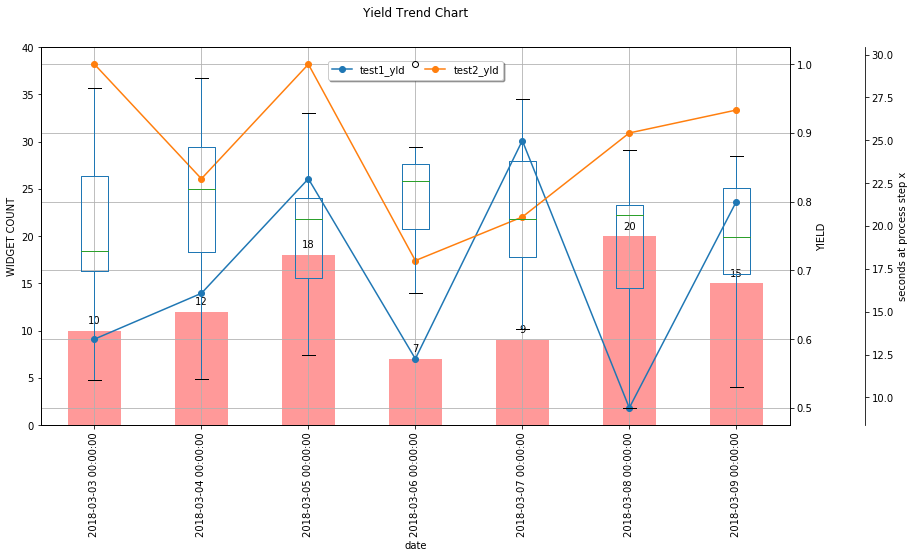

In [44]:
# plot bar chart for widget count in graph (1st y axis)
ax = yield_trend.plot(y='num_widgets', kind='bar', alpha=0.4, color='r', legend=None);

# for each bar, put a text label above it with the actual count value
for p in ax.patches:
 ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# establish your 2nd and 3rd y axis and positions
ax2 = ax.twinx()
ax3 = ax.twinx()
ax3.spines["right"].set_position(("axes", 1.1))

# on your 3rd y axis, plot a boxplot. This will show for each date, this distribution of your process param
bp = example_df.boxplot(column='process_param', by='date', ax=ax3, widths = 0.25, return_type='dict', positions=list(range(0,len(plt.gca().get_xticks()))));

# for each yield column, make a line plot, your label will be you column in the legend
for col in ['test1_yld', 'test2_yld']:
 ax2.plot(ax.get_xticks(), yield_trend[col], label=col, marker='o');
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, 0.90),
 fancybox=True, shadow=True, ncol=5);

plt.suptitle('Yield Trend Chart')
plt.title('')

ax2.grid(True, axis='y')
ax.grid(True, axis='x')
ax3.grid(False)
ax.set_ylabel('WIDGET COUNT')
ax2.set_ylabel('YIELD')
ax3.set_ylabel('seconds at process step x')
ax.set_ylim(0, 40);

len(plt.gca().get_xticks());
# plt.show();